In [3]:
import os
import sys
root_dir = os.path.split(os.getcwd())[0]
script_dir = os.path.join(root_dir, 'script')
if script_dir not in sys.path:
    sys.path.append(script_dir)

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from data.lab_data import DATA_FOLDER, get_segment_name

In [5]:
# Load data
filepath = os.path.join(DATA_FOLDER, 'fixations.csv')
df = pd.read_csv(filepath)

# Correct segment names that should be in one category
_correct_segments = {
'MWSelfReports_Interactive Site': 'MW. Self report (Interactive Site)',
'MWSelfReports_Text - Eng': 'MW. Self report (Text - Eng)',
'MWSelfReports_Video - Eng': 'MW. Self report (Video - Eng)',
'MWSelfReports_Video - Mind Wandering': 'Video - Mind Wandering', # Somebody pressed 'q' during Mind wndering task
'RockNPoll - High Eng': 'Interactive Site'
} 

def correct_segment(segment):
    segment = get_segment_name(segment)
    return _correct_segments[segment] if segment in _correct_segments.keys() else segment

df['segment'] = df['SegmentName'].apply(correct_segment)

In [6]:
engaged_segments = ['Interactive Site', 'Mind Game', 'Text - Eng', 'Video', 'Video - Eng']
disengaged_segments = ['Disengagement', 'Disengagement Mobile', 'Disengagement Room',
       'MW. Self report (Text - Eng)', 'MW. Self report (Video - Eng)',
       'MW. Self report (Interactive Site)', 'Mind Wandering', 'Text - Diseng',
       'Text - Mind Wandering', 'Video - Diseng', 'Video - Mind Wandering']
eng_to_svk_segment = {
    'MW. Self report (Interactive Site)': 'Nahlásené MO (Interaktívna Stránka)',
    'MW. Self report (Text - Eng)': 'Nahlásené MO (Text - Zaujatie)',
    'MW. Self report (Video - Eng)': 'Nahlásené MO (Video - Zaujatie)',
    'Interactive Site': 'Interaktívna stránka',
    'Text - Eng': 'Text - Zaujatie',
    'Video - Eng': 'Video - Zaujatie',
    'Mind Game': 'Pexeso',
    'Video': 'Video',
    'Text - Mind Wandering': 'Text - Myšienkové odbehnutie',
    'Video - Mind Wandering': 'Video - Myšlienkové odbehnutie', # Somebody pressed 'q' during Mind wndering task
    'Mind Wandering': 'Myšienkové odbehnutie',
    'Disengagement': 'Nezaujatie',
    'Disengagement Room': 'Nezaujatie Miestnosť',
    'Disengagement Mobile': 'Nezaujatie Mobil',
    'Text - Diseng': 'Text - Nezaujatie ',
    'Video - Diseng': 'Video - Nezaujatie',
}


In [7]:
df['segment'] = df['segment'].apply(lambda x: eng_to_svk_segment[x])

In [9]:
def record_per_second():
    return 1/60

def get_engaged_data(_df=None):
    if _df is None:
        _df = df
    return _df[_df['label'] == 'engagement']

def get_disengaged_data(_df=None):
    if _df is None:
        _df = df
    return _df[_df['label'] == 'disengagement']

def get_segment_durations():
    from data.lab_data import LabData
    cols = ['StudioTestName', 'RecordingName', 'SegmentName', 'ParticipantName', 'SegmentDuration']
    import pandas as pd
    durations = []
    participants = []
    segments = []
    visited = set()
    fpms = LabData.RECORDS_FPS * 0.001  # Convert to frames per millisecond
    for test, record, record_filepath, segment, df in \
            LabData()._record_segment_data(cols):
        search_combination = (test, record, segment)
        # If unique comb.
        if search_combination not in visited:
            # Convert ms to frame index
            duration = int(df['SegmentDuration'].iloc[0])
            participant = df['ParticipantName'].iloc[0]
            durations.append(duration)
            participants.append(participant)
            segments.append(segment)
            visited.add(search_combination)
    index = pd.MultiIndex.from_tuples(list(zip(participants, segments)), names=['participant', 'segment'])
    return pd.Series(durations, index=index)

durations_series = get_segment_durations()

print('Total segment time (without NeutraFace)',
      (durations_series.sum()-durations_series.loc[:,'Neutral Face 1'].sum())/1000)
# def total_segment_time():
#     return 9995+600009+601800+410640+309865+240720+259600+
# 218251+103411+249200+299887+389142+597612+365980+309717+
# 301122+299678 + 299987 + 299950

# 6166566

'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P00_Rec 01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P00_Rec 01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P00_Rec 01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P00_Rec 01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P00_Rec 01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P00_Rec 01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P00_Rec 01.mp4' not found!
d

'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P01_rec_01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P01_rec_01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P01_rec_01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P01_rec_01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P01_rec_01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P01_rec_01.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 1/usercams/P01_rec_01.mp4' not found!
d

'/home/viktor/workspace/engagement-recognition/data/lab/Test 3/usercams/Rec 13.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 3/usercams/Rec 13.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 3/usercams/Rec 13.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 121.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 121.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 121.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 121.mp4' not found!
data.tsv and records in u

'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 23.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 23.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 23.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 23.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 23.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 23.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 23.mp4' not found!
data.tsv and records in userc

'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 21.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 21.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 21.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 21.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 21.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 21.mp4' not found!
data.tsv and records in usercams are inconsistent!
'/home/viktor/workspace/engagement-recognition/data/lab/Test 4/usercams/Rec 21.mp4' not found!
data.tsv and records in userc

Total segment time (without NeutraFace) 28931.743


In [10]:
def get_fixations(df):
    return len(df['FixationIndex'].unique())

def get_time_sec(df):
    return len(df) * record_per_second()

def get_fixations_rate(df):
    return get_fixations(df) / get_time_sec(df)

def apply_per_raw_segment(df, fn):
    return pd.Series({segment: fn(df_seg) for segment, df_seg in df.groupby('SegmentName')})
    
def apply_per_segment(df, fn):
    return pd.Series({segment: fn(df_seg) for segment, df_seg in df.groupby('segment')})
    
def per_segment_fixations(df):
    return apply_per_raw_segment(df, get_fixations.__call__)

def per_segment_fixation_rates(df):
    return apply_per_segment(df, lambda x: apply_per_raw_segment(x, get_fixations.__call__).sum() / get_time_sec(x))

def per_label_fixation_rates(df):
    engaged = get_engaged_data(df)
    disengaged = get_disengaged_data(df)
    return {
        'engagement': per_segment_fixations(engaged).sum() / get_time_sec(engaged),
        'disengagement': per_segment_fixations(disengaged).sum() / get_time_sec(engaged)
    }
    

In [11]:
def plot_segment_metric(metric_fn, title, ylabel, ax=None):
    if ax is None:
        fig_seg = plt.figure(figsize=(10,3))
        ax = fig_seg.add_subplot(111)
    
    xlabel = 'Segment'
    
    plt.setp(ax.get_xticklabels(), rotation=-30, horizontalalignment='left', fontsize=12)
    
#     ax.set_ylim([0.0,1.1])
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    data = metric_fn(get_engaged_data())
    data = data.sort_values(ascending=False)
    ax.bar(data.index, data.values, color='blue', label='Zaujatý')
    data = metric_fn(get_disengaged_data())
    data = data.sort_values(ascending=False)
    ax.bar(data.index, data.values, color='red', label='Nezaujatý')
    
    ax.legend(loc=9, bbox_to_anchor=(1.15, 0.7), prop={'size': 16})
    
def plot_segment_fixation_rates(df, ax=None):
    plot_segment_metric(
        metric_fn=per_segment_fixation_rates.__call__, 
        title='Frekvencia fixácie pre segmenty', 
        ylabel='Frekvencia fixácii [f/s]',
        ax=ax)

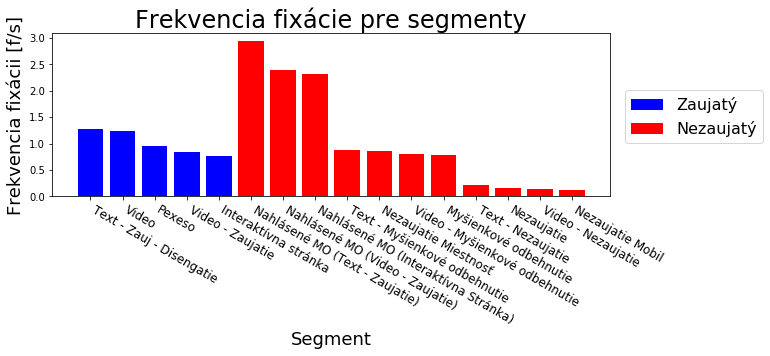

In [12]:
plot_segment_fixation_rates(df)

In [33]:
per_label_fixation_rates(df)

{'engagement': 0.8607873087998966, 'disengagement': 0.4660764688555275}

In [20]:
reports_df = df[df['SegmentName'].isin(['MWSelfReports_Video - Eng 1','MWSelfReports_Video - Mind Wandering 1', 'MWSelfReports_Interactive Site 1'])]
reports_df.head()

RecordingName                  SegmentName ParticipantName label  \
51396    P00_Rec 01  MWSelfReports_Video - Eng 1             P01     0   
51397    P00_Rec 01  MWSelfReports_Video - Eng 1             P01     0   
51398    P00_Rec 01  MWSelfReports_Video - Eng 1             P01     0   
51399    P00_Rec 01  MWSelfReports_Video - Eng 1             P01     0   
51400    P00_Rec 01  MWSelfReports_Video - Eng 1             P01     0   

       RecordingTimestamp  ValidityLeft  ValidityRight  DistanceLeft  \
51396           1077767.0           0.0            0.0        499.69   
51397           1077784.0           0.0            0.0        499.71   
51398           1077800.0           0.0            0.0        499.75   
51399           1077802.0           NaN            NaN           NaN   
51400           1077817.0           0.0            0.0        499.77   

       DistanceRight  PupilLeft              ...                \
51396         499.69       4.51              ...                 
51397         499.71       4.36              ...                 
51398         499.75       4.33              ...                 
51399            NaN        NaN              ...                 
51400         499.77       4.40              ...                 

       GazePointLeftY (ADCSpx)  GazePointRightX (ADCSpx)  \
51396                   1172.0                    1941.0   
51397                   1148.0                    1954.0   
51398                   1141.0                    1952.0   
51399                      NaN                       NaN   
51400                   1105.0                    1943.0   

       GazePointRightY (ADCSpx)  GazePointX (ADCSpx)  GazePointY (ADCSpx)  \
51396                    1146.0               1918.0               1159.0   
51397                    1149.0               1933.0               1148.0   
51398                    1151.0               1940.0               1146.0   
51399                       NaN                  NaN                  NaN   
51400                    1163.0               1927.0               1134.0   

       FixationIndex  SaccadeIndex  GazeEventType  GazeEventDuration  \
51396          416.0           NaN       Fixation              384.0   
51397          416.0           NaN       Fixation              384.0   
51398          416.0           NaN       Fixation              384.0   
51399          416.0           NaN       Fixation              384.0   
51400          416.0           NaN       Fixation              384.0   

                             segment  
51396  MW. Self report (Video - Eng)  
51397  MW. Self report (Video - Eng)  
51398  MW. Self report (Video - Eng)  
51399  MW. Self report (Video - Eng)  
51400  MW. Self report (Video - Eng)  

[5 rows x 29 columns]